# Create LV2 Dataset
---

In [1]:
import h5py
import os
import glob
import numpy as np
import cv2
from tqdm import tqdm

In [11]:
DATA_DIR = os.path.join(os.getenv('HOME'), 'workspace/Hackerton/RSI_OP_NIA_AIHUB')

##################### Building
IMG_PATHS = [
    os.path.join(DATA_DIR, 'buildings/training/raw'),
    os.path.join(DATA_DIR, 'buildings/validation/raw'),
    os.path.join(DATA_DIR, 'roads/training/raw'),
    os.path.join(DATA_DIR, 'roads/validation/raw')
]
TRAIN_LABEL_DIR = os.path.join(DATA_DIR, 'LV2/train')
VAL_LABEL_DIR = os.path.join(DATA_DIR, 'LV2/val')

In [12]:
datset_list_path = {
    'train': os.path.join(DATA_DIR, 'BnR_train_list.txt'),
    'val': os.path.join(DATA_DIR, 'BnR_val_list.txt')
}

In [19]:
def get_pull_path(file_name):
    img_path = -1
    for dir_path in IMG_PATHS:
        if os.path.isfile(f'{dir_path}/{file_name}'):
            img_path = f'{dir_path}/{file_name}'
            break
    return img_path

def read_file_path(path_list):
    file_path_dict = {}
    for key, path in path_list.items():
        with open(path, 'r') as f:
            LABEL_BASE_PATH = VAL_LABEL_DIR if key == 'val' else TRAIN_LABEL_DIR
            
            _list = f.readlines()
            _list = [ file_path.split("\n")[0] for file_path in _list]
            _list = [ file_path.split(".")[0] + ".png" for file_path in _list]
            img_list = [ get_pull_path(file_name) for file_name in _list]
            label_list = [ f'{LABEL_BASE_PATH}/{file_name}' if img_list[i] != 0 else -1 
                           for i, file_name in enumerate(_list)]
            
            file_path_dict[key] = {'img': img_list, 'label': label_list}
    return file_path_dict

datset_list = read_file_path(datset_list_path)

In [24]:
print(f'num of train: {len(datset_list["train"]["img"])}')
print(f'num of validation: {len(datset_list["val"]["img"])}')

num of train: 324
num of validation: 30


In [25]:
train_shape = (len(datset_list["train"]["img"]), 1024, 1024, 3)
val_shape = (len(datset_list["val"]["img"]), 1024, 1024, 3)

---

hdf5 구성
 - group : train
    - dataset : img
    - dataset : label
- group : val
    - dataset : img
    - dataset : label

In [26]:
with h5py.File('./LV2_PNG_DATASET.h5', 'w') as h5:
    for key in ['train', 'val']:  
        group = h5.create_group(key)
        shape = (len(datset_list[key]["img"]), 1024, 1024, 3)
        group.create_dataset('img', shape, np.uint8)
        group.create_dataset('label', shape, np.uint8)

        # write the images
        for i in tqdm(range(shape[0]), desc=f'Write {key} image'):
            img = cv2.cvtColor(cv2.imread(datset_list[key]["img"][i]), cv2.COLOR_BGR2RGB)
            label = cv2.cvtColor(cv2.imread(datset_list[key]["label"][i]), cv2.COLOR_BGR2RGB)
            group['img'][i, ...] = img
            group['label'][i, ...] = label

Write val image: 100%|██████████| 30/30 [00:01<00:00, 19.75it/s]


### TEST

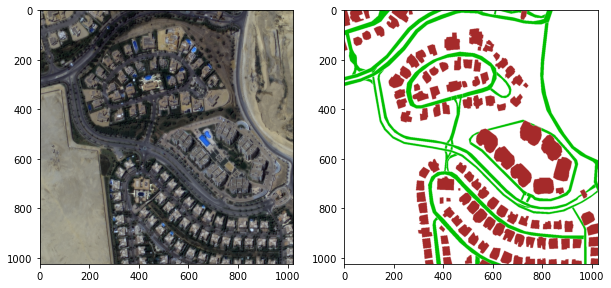

In [29]:
import matplotlib.pyplot as plt

with h5py.File('./LV2_PNG_DATASET.h5', 'r') as hdf5_file:
    i = 0
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(hdf5_file['train']['img'][i])
    plt.subplot(122)
    plt.imshow(hdf5_file['train']['label'][i])
    plt.show()

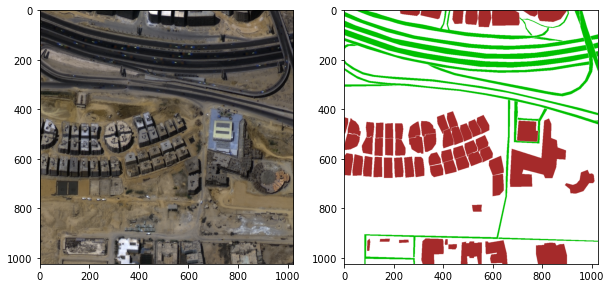

In [31]:
with h5py.File('./LV2_PNG_DATASET.h5', 'r') as hdf5_file:
    i = 29
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(hdf5_file['val']['img'][i])
    plt.subplot(122)
    plt.imshow(hdf5_file['val']['label'][i])
    plt.show()